In [ ]:
!pip install torch torchvision torchaudio
!pip install matplotlib opencv-python pandas
!pip install notebook
!pip install python-docx

In [ ]:
!pip install python-docx


  Using cached python_docx-1.1.2-py3-none-any.whl.metadata (2.0 kB)
Using cached python_docx-1.1.2-py3-none-any.whl (244 kB)
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 37.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import os

# Usamos r"" para evitar errores con espacios y backslashes en Windows
carpeta = r"C:\Users\Manuel Peña Torres\Foodlens\dataset\pdfs - Copy\Buendia - Instruccion"
contenido = os.listdir(carpeta)
print("Contenido de la carpeta:", carpeta)
for item in contenido:
    print("  📄", item)



Contenido de la carpeta: C:\Users\Manuel Peña Torres\Foodlens\dataset\pdfs - Copy\Buendia - Instruccion
  📄 Buendia_transcription.docx
  📄 pages
  📄 segmented


In [17]:
from PIL import Image
import os
import matplotlib.pyplot as plt

ruta_segmentos = r"C:\Users\Manuel Peña Torres\Foodlens\dataset\pdfs - Copy\Buendia - Instruccion\segmented"

def mostrar_segmento(indice=0):
    imagenes = [f for f in os.listdir(ruta_segmentos) if f.endswith(('.png', '.jpg'))]
    imagenes.sort()

    if indice >= len(imagenes):
        print("⚠️ Índice fuera de rango.")
        return

    nombre_imagen = imagenes[indice]
    ruta_imagen = os.path.join(ruta_segmentos, nombre_imagen)

    print("📂 Ruta completa de la imagen:", ruta_imagen)

    try:
        imagen = Image.open(ruta_imagen)
        print("✅ Imagen cargada correctamente.")
        plt.imshow(imagen)
        plt.title(f"Segmento: {nombre_imagen}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print("❌ Error al abrir la imagen:", e)



📂 Ruta completa de la imagen: C:\Users\Manuel Peña Torres\Foodlens\dataset\pdfs - Copy\Buendia - Instruccion\segmented\Buendia - Instruccion_page_1-postprocessed.png_line_11.png
✅ Imagen cargada correctamente.


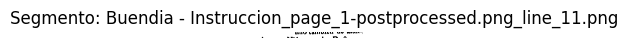

In [18]:
mostrar_segmento(0)


In [19]:
from docx import Document

# 📄 Ruta al archivo de transcripción
ruta_transcripcion = r"C:\Users\Manuel Peña Torres\Foodlens\dataset\pdfs - Copy\Buendia - Instruccion\Buendia_transcription.docx"

# 🧾 Leer y dividir por líneas
def obtener_lineas_transcripcion(ruta_docx):
    documento = Document(ruta_docx)
    lineas = []
    for parrafo in documento.paragraphs:
        texto = parrafo.text.strip()
        if texto:  # Ignorar líneas vacías
            lineas.append(texto)
    return lineas

# ▶️ Ejecutar y mostrar las primeras 5 líneas
lineas = obtener_lineas_transcripcion(ruta_transcripcion)
for i, linea in enumerate(lineas[:5]):
    print(f"Línea {i+1}: {linea}")


Línea 1: PDF p1
Línea 2: Al
INFINITAMENTE AMABLE
NIÑO JESUS.
Línea 3: A Vos, Dulcissimo Niño
JESUS, que no solo os
dignasteis de llamaros
Doctor de los Niños, 
sino también de assis-
tir como Niño entre los Doctores, 
se consagra humilde esta pequeña
Instrucción de los Niños. Es assi, 
que ella también se dirige a la ju-
ventud; pero a esta, como recuer-
do de lo que aprendió, a los Ni-
ños, como precisa explicacion de 
lo que deben estudiar. Por este so-
lo titulo es muy vuestra; y por
ser para Niños, que confiais a la
educacion de vuestra Compañia, 
lo es mucho mas. En Vos, (Divi-
no Exemplar de todas las virtu-
des) tienen abreviado el mas se-
Línea 4: PDF p2
Línea 5: guro disseño de su edad: la Reli-
gion para con Dios en la devota		vinas bendiciones, les unisteis
assistencia a los Templos; la piedad	a vuestro sagrado pecho con sua-
con los Padres en la obediencia		vissimos abrazos. Dichosa edad,
mas rendida; y la modestia, y de-	
seo de saber, con los mayores, 		riños!
gustando ma

In [21]:
def mostrar_segmento_con_texto(indice=0):
    imagenes = [f for f in os.listdir(ruta_segmentos) if f.endswith(('.png', '.jpg'))]
    imagenes.sort()

    if indice >= len(imagenes) or indice >= len(lineas):
        print("⚠️ Índice fuera de rango para imágenes o líneas.")
        return

    nombre_imagen = imagenes[indice]
    ruta_imagen = os.path.join(ruta_segmentos, nombre_imagen)
    texto_linea = lineas[indice]

    print(f"📂 Imagen: {nombre_imagen}")
    print(f"📝 Texto asociado: {texto_linea}")

    try:
        imagen = Image.open(ruta_imagen)
        plt.imshow(imagen)
        plt.title(f"Texto: {texto_linea}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print("❌ Error al abrir la imagen:", e)


📂 Imagen: Buendia - Instruccion_page_1-postprocessed.png_line_13.png
📝 Texto asociado: A Vos, Dulcissimo Niño
JESUS, que no solo os
dignasteis de llamaros
Doctor de los Niños, 
sino también de assis-
tir como Niño entre los Doctores, 
se consagra humilde esta pequeña
Instrucción de los Niños. Es assi, 
que ella también se dirige a la ju-
ventud; pero a esta, como recuer-
do de lo que aprendió, a los Ni-
ños, como precisa explicacion de 
lo que deben estudiar. Por este so-
lo titulo es muy vuestra; y por
ser para Niños, que confiais a la
educacion de vuestra Compañia, 
lo es mucho mas. En Vos, (Divi-
no Exemplar de todas las virtu-
des) tienen abreviado el mas se-


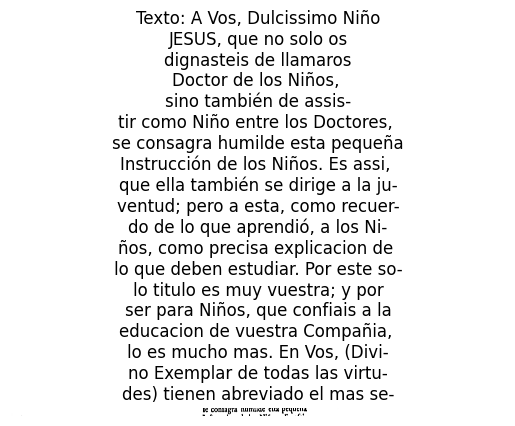

In [23]:
mostrar_segmento_con_texto(2)  # Por ejemplo, línea 2


In [24]:
# Crear lista de pares (ruta_imagen, texto)
pares_entrenamiento = []

imagenes = [f for f in os.listdir(ruta_segmentos) if f.endswith(('.png', '.jpg'))]
imagenes.sort()

# Asegurar que el número de líneas y de imágenes coincida
cantidad = min(len(imagenes), len(lineas))

for i in range(cantidad):
    nombre_imagen = imagenes[i]
    ruta_completa = os.path.join(ruta_segmentos, nombre_imagen)
    texto = lineas[i]
    pares_entrenamiento.append((ruta_completa, texto))

print(f"✅ {len(pares_entrenamiento)} pares preparados para entrenamiento.")
print("🧾 Ejemplo:")
print(pares_entrenamiento[0])


✅ 8 pares preparados para entrenamiento.
🧾 Ejemplo:
('C:\\Users\\Manuel Peña Torres\\Foodlens\\dataset\\pdfs - Copy\\Buendia - Instruccion\\segmented\\Buendia - Instruccion_page_1-postprocessed.png_line_11.png', 'PDF p1')


In [26]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms


In [27]:
class OCRDataset(Dataset):
    def __init__(self, pares_imagen_texto, transformacion=None):
        self.datos = pares_imagen_texto
        self.transformacion = transformacion

    def __len__(self):
        return len(self.datos)

    def __getitem__(self, indice):
        ruta_imagen, texto = self.datos[indice]

        imagen = Image.open(ruta_imagen).convert("L")  # L = escala de grises

        if self.transformacion:
            imagen = self.transformacion(imagen)

        return imagen, texto


In [33]:
from PIL import ImageOps

class RedimensionarOCR:
    def __init__(self, alto_objetivo=32, ancho_objetivo=256):
        self.alto_obj = alto_objetivo
        self.ancho_obj = ancho_objetivo

    def __call__(self, imagen):
        ancho_original, alto_original = imagen.size
        escala = self.alto_obj / alto_original
        nuevo_ancho = int(ancho_original * escala)
        imagen_redimensionada = imagen.resize((nuevo_ancho, self.alto_obj), Image.BILINEAR)

        if nuevo_ancho < self.ancho_obj:
            padding = (0, 0, self.ancho_obj - nuevo_ancho, 0)
            imagen_redimensionada = ImageOps.expand(imagen_redimensionada, padding, fill=255)
        elif nuevo_ancho > self.ancho_obj:
            imagen_redimensionada = imagen_redimensionada.crop((0, 0, self.ancho_obj, self.alto_obj))

        return imagen_redimensionada


In [34]:
transformacion_ocr = transforms.Compose([
    RedimensionarOCR(32, 256),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])



In [35]:
dataset_ocr = OCRDataset(pares_entrenamiento, transformacion=transformacion_ocr)

cargador_datos = DataLoader(
    dataset_ocr,
    batch_size=16,
    shuffle=True,
    num_workers=0
)


In [36]:
imagenes, textos = next(iter(cargador_datos))
print(f"Tamaño batch de imágenes: {imagenes.shape}")  # [batch, canales, alto, ancho]
print(f"Ejemplo de texto: {textos[0]}")


Tamaño batch de imágenes: torch.Size([8, 1, 32, 256])
Ejemplo de texto: PDF p2


In [40]:
from PIL import Image
import os

# Paso 1: limpiar líneas de texto
lineas_limpias = [linea.strip() for linea in lineas if linea.strip() and not linea.lower().startswith("pdf")]

# Paso 2: cargar y ordenar imágenes segmentadas
imagenes = [f for f in os.listdir(ruta_segmentos) if f.endswith(('.png', '.jpg'))]
imagenes.sort()

# Paso 3: emparejar solo las que coincidan en cantidad
cantidad = min(len(imagenes), len(lineas_limpias))

pares_entrenamiento = []

for i in range(cantidad):
    ruta_completa = os.path.join(ruta_segmentos, imagenes[i])
    texto = lineas_limpias[i]

    # Paso 4: filtrar imágenes demasiado pequeñas (probablemente ruido)
    with Image.open(ruta_completa) as im:
        ancho, alto = im.size
        if ancho > 50 and alto > 10:
            pares_entrenamiento.append((ruta_completa, texto))

# Resultado
print(f"✅ {len(pares_entrenamiento)} pares limpios preparados para entrenamiento.")
print("🧾 Ejemplo:")
print(pares_entrenamiento[0])


✅ 5 pares limpios preparados para entrenamiento.
🧾 Ejemplo:
('C:\\Users\\Manuel Peña Torres\\Foodlens\\dataset\\pdfs - Copy\\Buendia - Instruccion\\segmented\\Buendia - Instruccion_page_1-postprocessed.png_line_11.png', 'Al\nINFINITAMENTE AMABLE\nNIÑO JESUS.')


C:\Users\Manuel Peña Torres\AppData\Local\Temp\ipykernel_20520\680402806.py:31: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


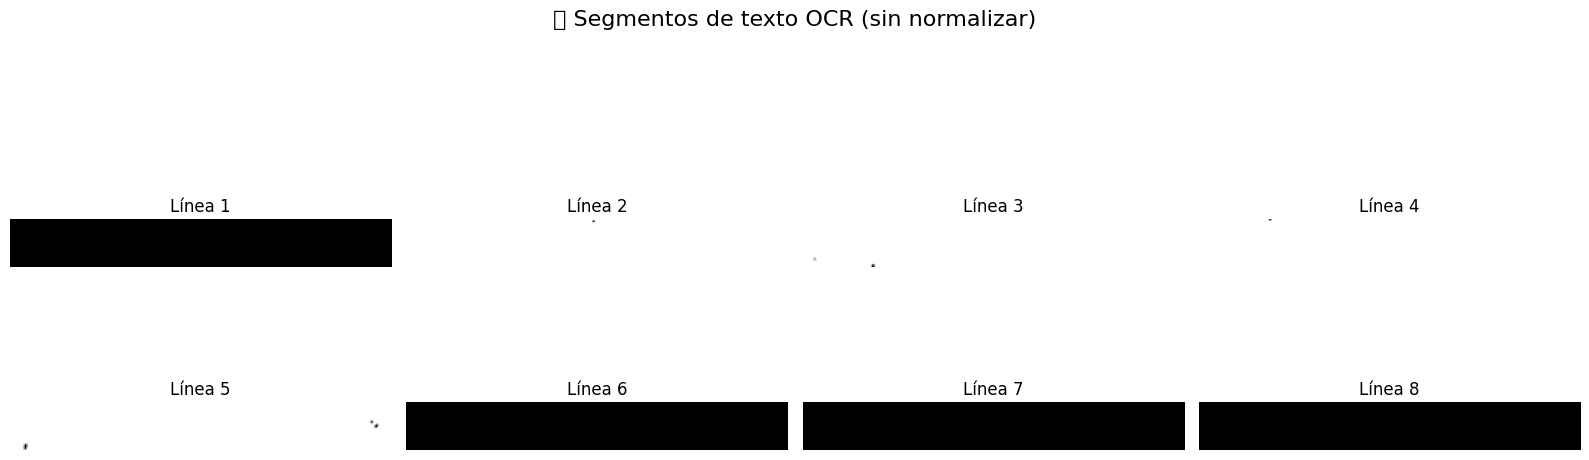

In [39]:
# 🔍 Solo para inspección visual
transformacion_visual = transforms.Compose([
    RedimensionarOCR(32, 256),
    transforms.ToTensor()
])

# Dataset solo para ver imágenes sin normalizar
dataset_visual = OCRDataset(pares_entrenamiento, transformacion=transformacion_visual)

# Dataloader pequeño
dataloader_visual = DataLoader(dataset_visual, batch_size=8, shuffle=False)

# Visualizar un batch
imagenes, textos = next(iter(dataloader_visual))

# Mostrar
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(16, 6))
fig.suptitle("🔍 Segmentos de texto OCR (sin normalizar)", fontsize=16)

for i, ax in enumerate(axes.flatten()):
    if i >= len(imagenes):
        break
    imagen = imagenes[i].squeeze(0).numpy()  # quitar canal
    ax.imshow(imagen, cmap='gray')
    ax.set_title(f"Línea {i+1}")
    ax.set_xlabel(textos[i][:50] + ("..." if len(textos[i]) > 50 else ""))
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
